In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,precision_score,f1_score

In [137]:
train=pd.read_csv("E:/DATA_SET/Loan_train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [138]:
test_data=pd.read_csv("E:/DATA_SET/Loan_test_lAUu6dG.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [139]:
A=list(test_data["Loan_ID"])

In [140]:
len(A)

367

In [141]:
train.shape

(614, 13)

In [142]:
test_data.shape

(367, 12)

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [144]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [145]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [147]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### Exploratory Data Analysis

In [148]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [149]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [150]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [151]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

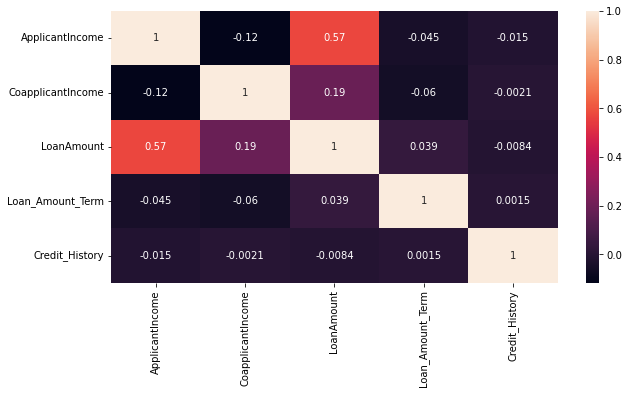

In [152]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

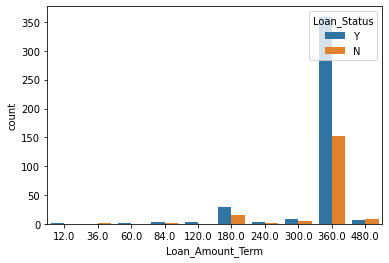

In [153]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=train)

<AxesSubplot:xlabel='Education', ylabel='count'>

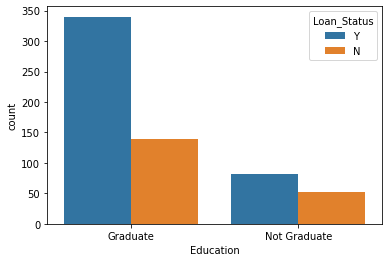

In [154]:
sns.countplot(x='Education',hue='Loan_Status',data=train)

<AxesSubplot:xlabel='Married', ylabel='count'>

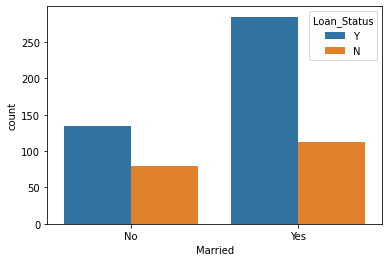

In [155]:
sns.countplot(x='Married',hue='Loan_Status',data=train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

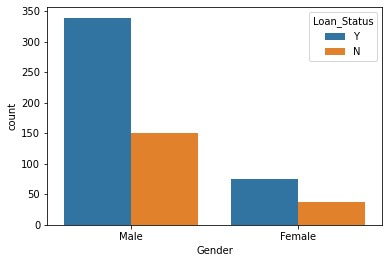

In [156]:
sns.countplot(x='Gender',hue='Loan_Status',data=train)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

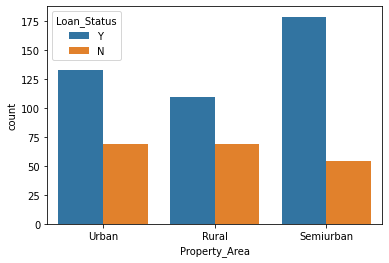

In [157]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

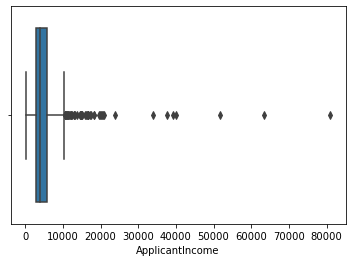

In [158]:
sns.boxplot(train['ApplicantIncome'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

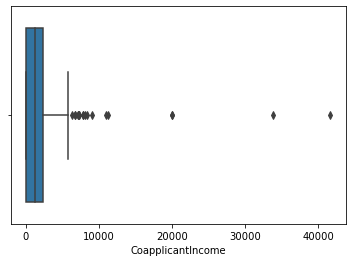

In [159]:
sns.boxplot(train['CoapplicantIncome'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

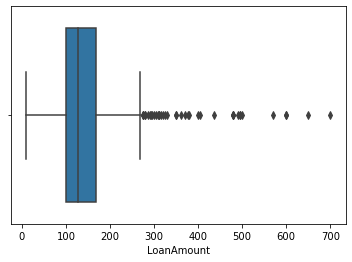

In [160]:
sns.boxplot(train['LoanAmount'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

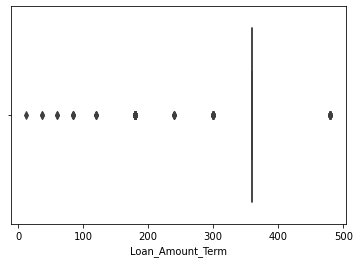

In [161]:
sns.boxplot(train['Loan_Amount_Term'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History'>

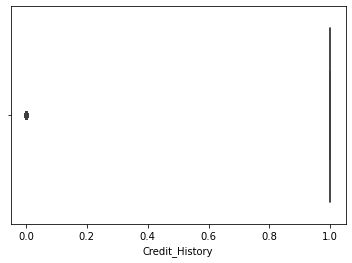

In [162]:
sns.boxplot(train['Credit_History'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ApplicantIncome')

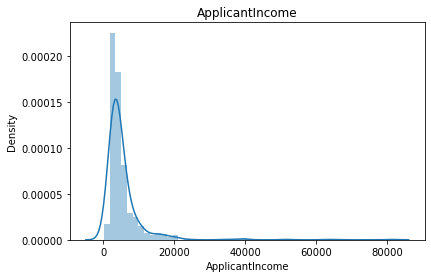

In [163]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.title('ApplicantIncome')

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CoapplicantIncome')

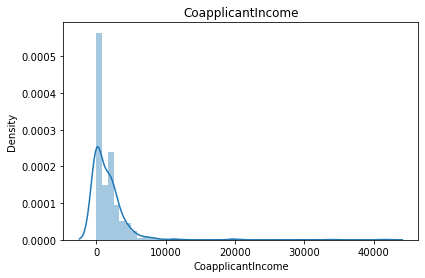

In [164]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.title('CoapplicantIncome')

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'LoanAmount')

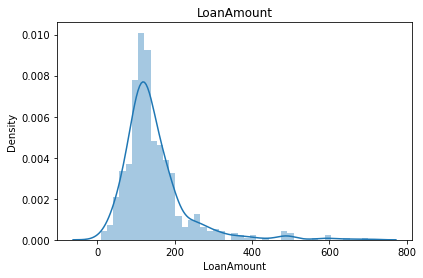

In [165]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.title('LoanAmount')

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loan_Amount_Term')

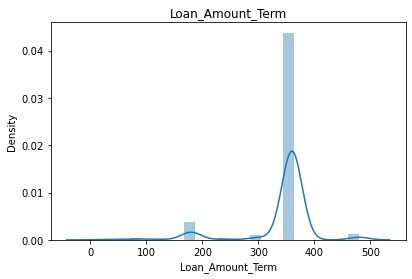

In [166]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term'])
plt.title('Loan_Amount_Term')

In [167]:
## replacing the 3+ value to 4 
train=train.replace(to_replace= '3+' ,value=4)

In [168]:
## replacing the 3+ value to 4 
test_data=test_data.replace(to_replace= '3+' ,value=4)

In [169]:
train.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [170]:
train.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
          'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [171]:
test_data.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
          'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2
1,LP001022,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,2
4,LP001051,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2


### Filling Missing value

In [172]:
train[['LoanAmount', 'Loan_Amount_Term']] =train[['LoanAmount', 'Loan_Amount_Term']].fillna(train[['LoanAmount', 'Loan_Amount_Term']].median())

In [173]:
test_data[['LoanAmount', 'Loan_Amount_Term']] = test_data[['LoanAmount', 'Loan_Amount_Term']].fillna(test_data[['LoanAmount', 'Loan_Amount_Term']].median())

In [174]:
train['Gender'].mode()

0    1.0
dtype: float64

In [175]:
train['Gender'].fillna(1.0,inplace=True)

In [176]:
test_data['Gender'].mode()

0    1.0
dtype: float64

In [177]:
test_data['Gender'].fillna(1.0,inplace=True)

In [178]:
train['Dependents'].mode()

0    0
dtype: object

In [179]:
train['Dependents'].fillna(0,inplace=True)

In [180]:
test_data['Dependents'].mode()

0    0
dtype: object

In [181]:
test_data['Dependents'].fillna(0,inplace=True)

In [182]:
train['Self_Employed'].mode()

0    0.0
dtype: float64

In [183]:
train['Self_Employed'].fillna(0.0,inplace=True)

In [184]:
test_data['Self_Employed'].mode()

0    0.0
dtype: float64

In [185]:
test_data['Self_Employed'].fillna(0.0,inplace=True)

In [186]:
train['Credit_History'].mode()

0    1.0
dtype: float64

In [187]:
train['Credit_History'].fillna(1.0,inplace=True)

In [188]:
test_data['Credit_History'].mode()

0    1.0
dtype: float64

In [189]:
test_data['Credit_History'].fillna(1.0,inplace=True)

In [190]:
train['Loan_Status'].mode()

0    1
dtype: int64

In [191]:
train['Loan_Status'].fillna(1.0,inplace=True)

In [192]:
train['Married'].mode()

0    1.0
dtype: float64

In [193]:
train['Married'].fillna(1.0,inplace=True)

In [194]:
test_data['Married'].mode()

0    1
dtype: int64

In [195]:
test_data['Married'].fillna(1.0,inplace=True)

In [196]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train['ApplicantIncome']=scaler.fit_transform(train[['ApplicantIncome']])

In [197]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test_data['ApplicantIncome']=scaler.fit_transform(test_data[['ApplicantIncome']])

In [198]:
train['LoanAmount']=scaler.fit_transform(train[['LoanAmount']])

In [199]:
test_data['LoanAmount']=scaler.fit_transform(test_data[['LoanAmount']])

In [200]:
train['Loan_Amount_Term']=scaler.fit_transform(train[['Loan_Amount_Term']])

In [201]:
test_data['Loan_Amount_Term']=scaler.fit_transform(test_data[['Loan_Amount_Term']])

In [202]:
train['CoapplicantIncome']=scaler.fit_transform(train[['CoapplicantIncome']])

In [203]:
test_data['CoapplicantIncome']=scaler.fit_transform(test_data[['CoapplicantIncome']])

### Handling Outliers

In [204]:
percentile25=train['ApplicantIncome'].quantile(0.25)
percentile75=train['ApplicantIncome'].quantile(0.75)

In [205]:
percentile25

-0.4138159313107222

In [206]:
percentile75

0.0641442589184265

In [207]:
iqr=percentile75-percentile25
iqr

0.4779601902291487

In [208]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [209]:
print("Upper_Limit",upper_limit)
print("Lower_Limit",lower_limit)

Upper_Limit 0.7810845442621495
Lower_Limit -1.1307562166544451


In [210]:
new_df1_cap=train.copy()

new_df1_cap['ApplicantIncome']=np.where(
    new_df1_cap['ApplicantIncome']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['ApplicantIncome']<lower_limit,
        lower_limit,
        new_df1_cap['ApplicantIncome']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='ApplicantIncome'>

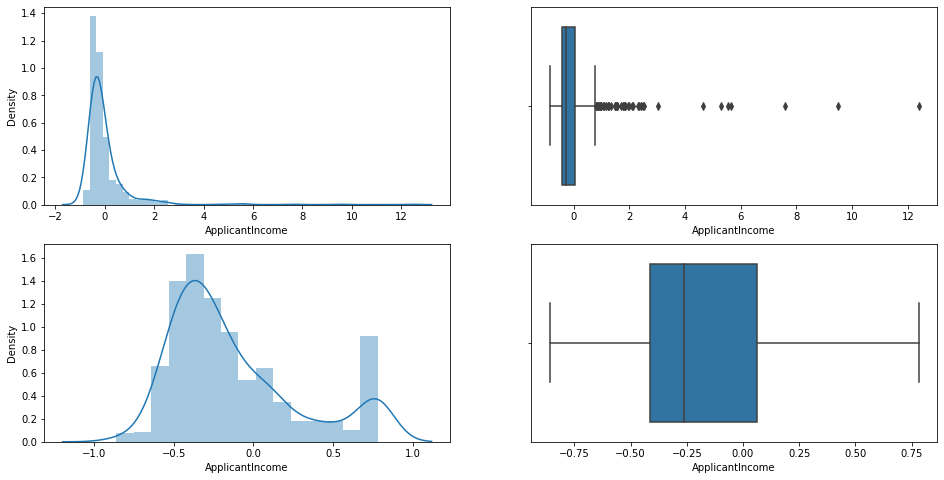

In [211]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['ApplicantIncome'])

plt.subplot(2,2,2)
sns.boxplot(train['ApplicantIncome'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['ApplicantIncome'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['ApplicantIncome'])


In [212]:
percentile25=test_data['ApplicantIncome'].quantile(0.25)
percentile75=test_data['ApplicantIncome'].quantile(0.75)

In [213]:
percentile25

-0.3959223501466689

In [214]:
percentile75

0.051876230896805056

In [215]:
iqr=percentile75-percentile25
iqr

0.4477985810434739

In [216]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [217]:
print("Upper_Limit",upper_limit)
print("Lower_Limit",lower_limit)

Upper_Limit 0.7235741024620159
Lower_Limit -1.0676202217118798


In [218]:
new_df1_cap=test_data.copy()

new_df1_cap['ApplicantIncome']=np.where(
    new_df1_cap['ApplicantIncome']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['ApplicantIncome']<lower_limit,
        lower_limit,
        new_df1_cap['ApplicantIncome']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='ApplicantIncome'>

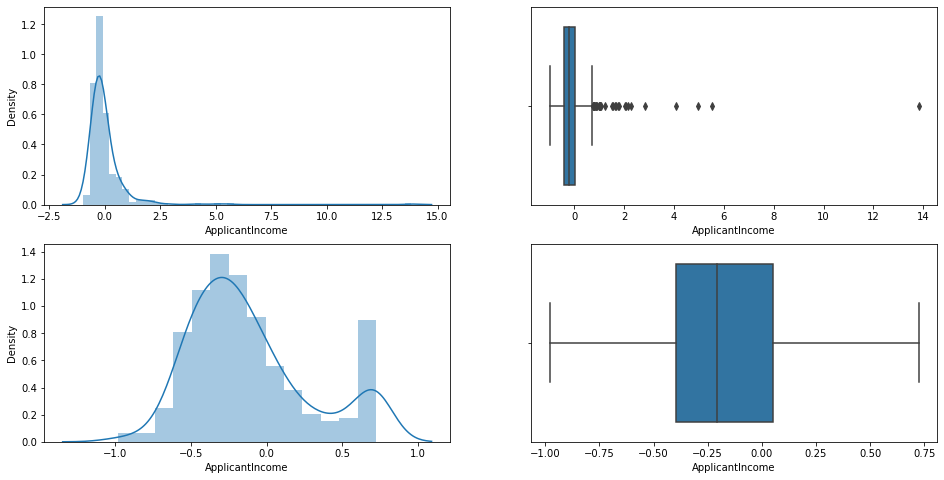

In [219]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test_data['ApplicantIncome'])

plt.subplot(2,2,2)
sns.boxplot(test_data['ApplicantIncome'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['ApplicantIncome'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['ApplicantIncome'])


In [220]:
percentile25=train['CoapplicantIncome'].quantile(0.25)
percentile75=train['CoapplicantIncome'].quantile(0.75)

In [221]:
iqr=percentile75-percentile25
iqr

0.7856896349363136

In [222]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [223]:
print("Upper_Limit",upper_limit)
print("Lower_Limit",lower_limit)

Upper_Limit 1.4097367571877988
Lower_Limit -1.7330217825574556


In [224]:
new_df1_cap=train.copy()

new_df1_cap['CoapplicantIncome']=np.where(
    new_df1_cap['CoapplicantIncome']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['CoapplicantIncome']<lower_limit,
        lower_limit,
        new_df1_cap['CoapplicantIncome']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='CoapplicantIncome'>

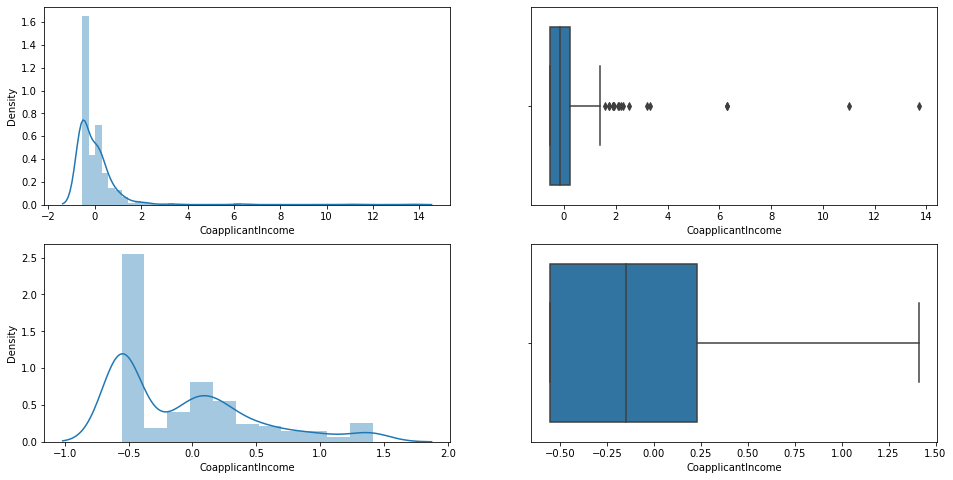

In [225]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(2,2,2)
sns.boxplot(train['CoapplicantIncome'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['CoapplicantIncome'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['CoapplicantIncome'])


In [226]:
percentile25=test_data['CoapplicantIncome'].quantile(0.25)
percentile75=test_data['CoapplicantIncome'].quantile(0.75)

In [227]:
iqr=percentile75-percentile25
iqr

1.0426632774229514

In [228]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [229]:
print("Upper_Limit",upper_limit)
print("Lower_Limit",lower_limit)

Upper_Limit 1.9333230840410762
Lower_Limit -2.2373300256507296


In [230]:
new_df1_cap=test_data.copy()

new_df1_cap['CoapplicantIncome']=np.where(
    new_df1_cap['CoapplicantIncome']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['CoapplicantIncome']<lower_limit,
        lower_limit,
        new_df1_cap['CoapplicantIncome']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='CoapplicantIncome'>

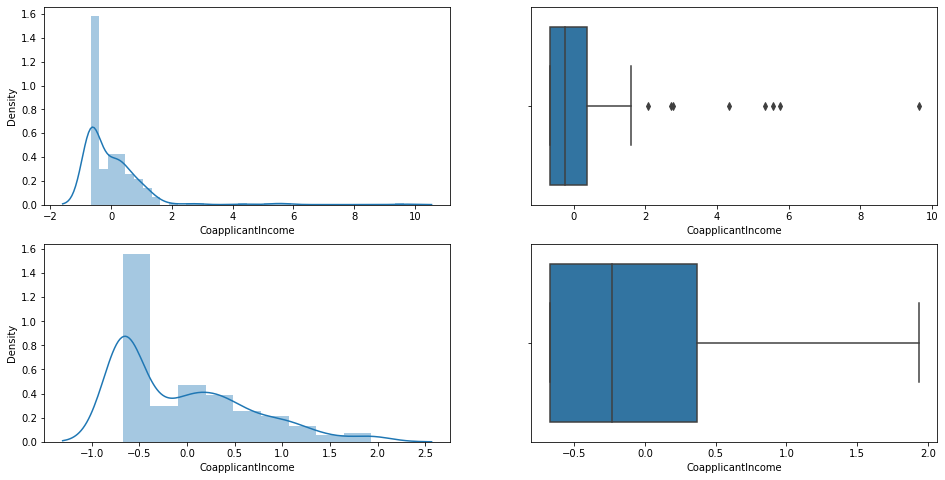

In [231]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test_data['CoapplicantIncome'])

plt.subplot(2,2,2)
sns.boxplot(test_data['CoapplicantIncome'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['CoapplicantIncome'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['CoapplicantIncome'])


In [232]:
percentile25=train['LoanAmount'].quantile(0.25)
percentile75=train['LoanAmount'].quantile(0.75)

In [233]:
iqr=percentile75-percentile25
iqr

0.7675034129787177

In [234]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [235]:
print("Upper_Limit",upper_limit)
print("Lower_Limit",lower_limit)

Upper_Limit 1.3773123262627702
Lower_Limit -1.6927013256521009


In [236]:
new_df1_cap=train.copy()

new_df1_cap['LoanAmount']=np.where(
    new_df1_cap['LoanAmount']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['LoanAmount']<lower_limit,
        lower_limit,
        new_df1_cap['LoanAmount']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='LoanAmount'>

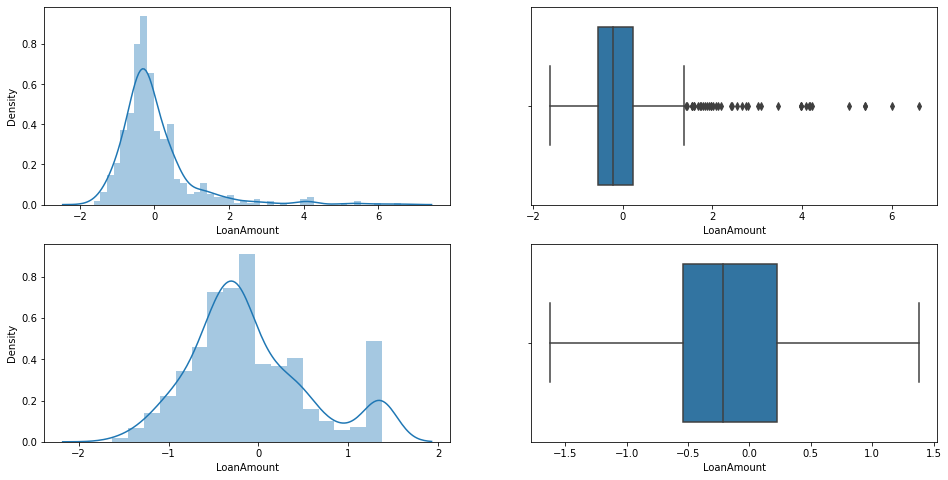

In [237]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['LoanAmount'])

plt.subplot(2,2,2)
sns.boxplot(train['LoanAmount'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['LoanAmount'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['LoanAmount'])


In [238]:
percentile25=test_data['LoanAmount'].quantile(0.25)
percentile75=test_data['LoanAmount'].quantile(0.75)

In [239]:
iqr=percentile75-percentile25
iqr

0.9281065489471907

In [240]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [241]:
print("Upper_Limit",upper_limit)
print("Lower_Limit",lower_limit)

Upper_Limit 1.7456464270865013
Lower_Limit -1.9667797687022617


In [242]:
new_df1_cap=test_data.copy()

new_df1_cap['LoanAmount']=np.where(
    new_df1_cap['LoanAmount']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['LoanAmount']<lower_limit,
        lower_limit,
        new_df1_cap['LoanAmount']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='LoanAmount'>

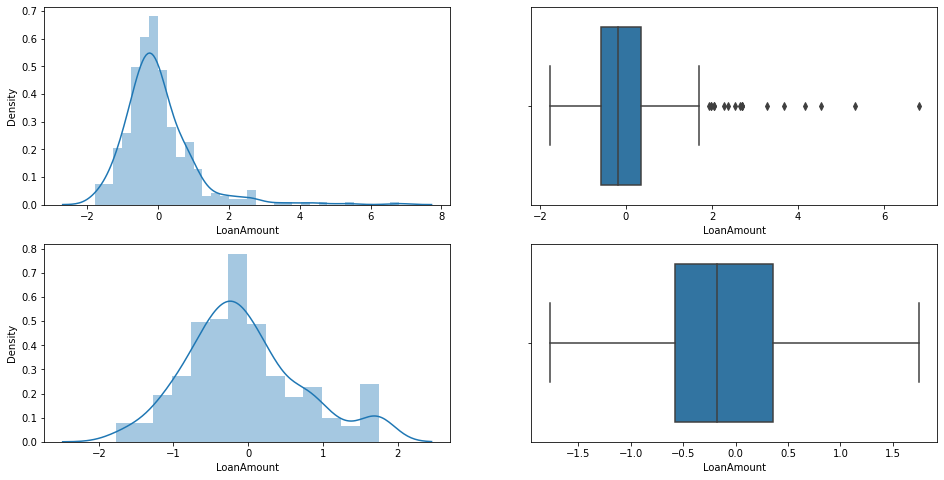

In [243]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test_data['LoanAmount'])

plt.subplot(2,2,2)
sns.boxplot(test_data['LoanAmount'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['LoanAmount'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['LoanAmount'])


In [244]:
percentile25=train['Loan_Amount_Term'].quantile(0.25)
percentile75=train['Loan_Amount_Term'].quantile(0.75)

In [245]:
iqr=percentile75-percentile25
iqr

0.0

In [246]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [247]:
new_df1_cap=train.copy()

new_df1_cap['Loan_Amount_Term']=np.where(
    new_df1_cap['Loan_Amount_Term']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['Loan_Amount_Term']<lower_limit,
        lower_limit,
        new_df1_cap['Loan_Amount_Term']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Loan_Amount_Term'>

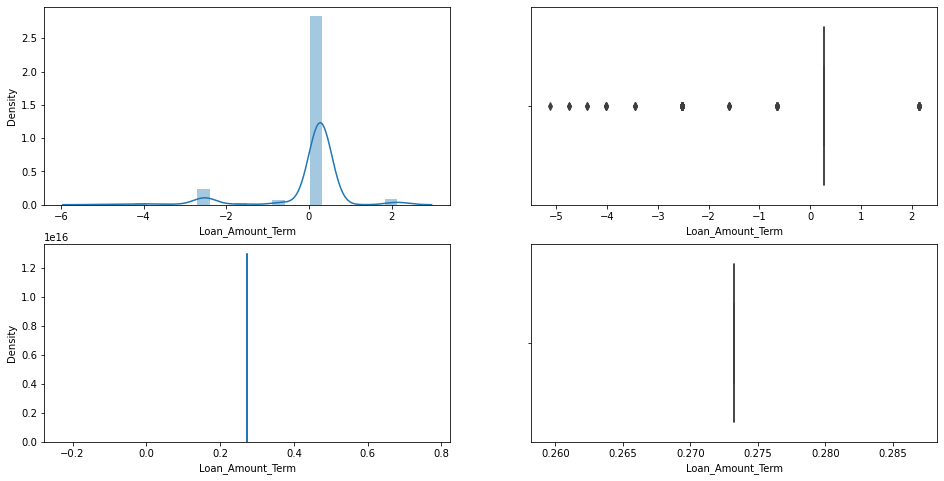

In [248]:
new_df1_cap.shape## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['Loan_Amount_Term'])

plt.subplot(2,2,2)
sns.boxplot(train['Loan_Amount_Term'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['Loan_Amount_Term'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['Loan_Amount_Term'])

In [249]:
percentile25=test_data['Loan_Amount_Term'].quantile(0.25)
percentile75=test_data['Loan_Amount_Term'].quantile(0.75)

In [250]:
iqr=percentile75-percentile25
iqr

0.0

In [251]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [252]:
new_df1_cap=test_data.copy()

new_df1_cap['Loan_Amount_Term']=np.where(
    new_df1_cap['Loan_Amount_Term']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['Loan_Amount_Term']<lower_limit,
        lower_limit,
        new_df1_cap['Loan_Amount_Term']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Loan_Amount_Term'>

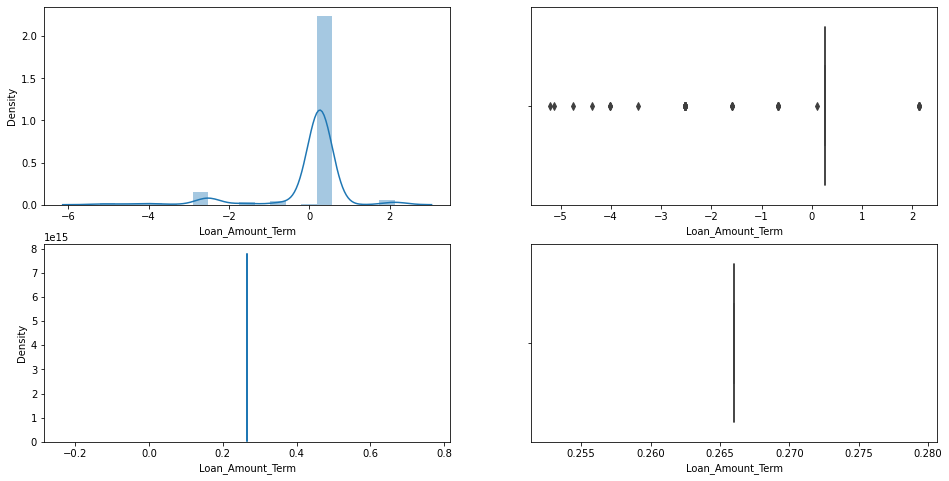

In [253]:
new_df1_cap.shape## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test_data['Loan_Amount_Term'])

plt.subplot(2,2,2)
sns.boxplot(test_data['Loan_Amount_Term'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['Loan_Amount_Term'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['Loan_Amount_Term'])


In [254]:
percentile25=train['Credit_History'].quantile(0.25)
percentile75=train['Credit_History'].quantile(0.75)

In [255]:
iqr=percentile75-percentile25
iqr

0.0

In [256]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [257]:
new_df1_cap=train.copy()

new_df1_cap['Credit_History']=np.where(
    new_df1_cap['Credit_History']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['Credit_History']<lower_limit,
        lower_limit,
        new_df1_cap['Credit_History']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Credit_History'>

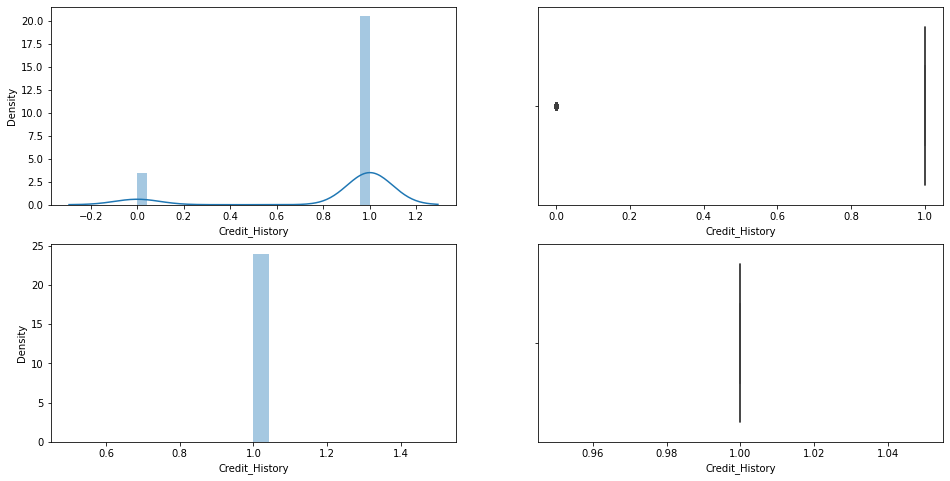

In [258]:
new_df1_cap.shape## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['Credit_History'])

plt.subplot(2,2,2)
sns.boxplot(train['Credit_History'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['Credit_History'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['Credit_History'])


In [259]:
percentile25=test_data['Credit_History'].quantile(0.25)
percentile75=test_data['Credit_History'].quantile(0.75)

In [260]:
iqr=percentile75-percentile25
iqr

0.0

In [261]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [262]:
new_df1_cap=test_data.copy()

new_df1_cap['Credit_History']=np.where(
    new_df1_cap['Credit_History']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['Credit_History']<lower_limit,
        lower_limit,
        new_df1_cap['Credit_History']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Credit_History'>

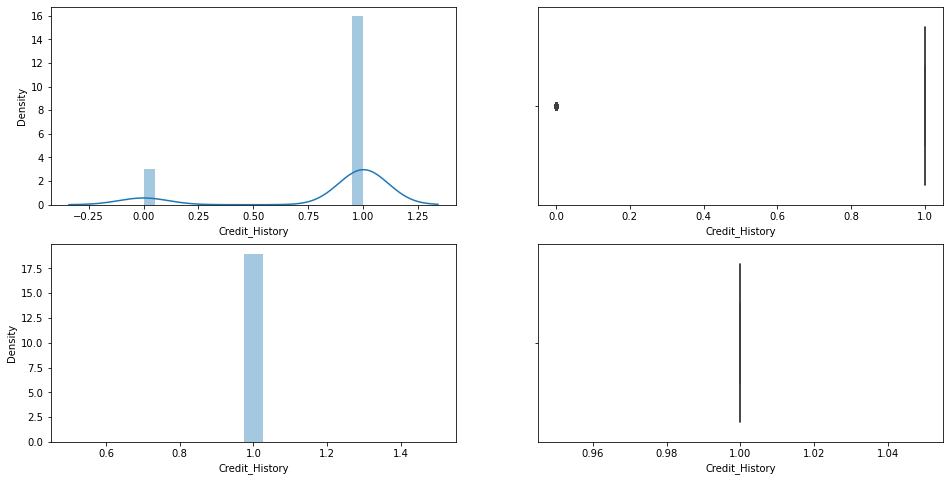

In [263]:
new_df1_cap.shape## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test_data['Credit_History'])

plt.subplot(2,2,2)
sns.boxplot(test_data['Credit_History'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['Credit_History'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['Credit_History'])


In [264]:
train1=train.drop(['Loan_ID'],axis=1)

In [265]:
test_data1=test_data.drop(['Loan_ID'],axis=1)

### Split data X and Y variable

In [266]:
x=train1.drop(columns=['Loan_Status',])
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,1,0.0,0.072991,-0.554487,-0.211241,0.273231,1.0,2
1,1.0,1.0,1,1,0.0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0
2,1.0,1.0,0,1,1.0,-0.393747,-0.554487,-0.948996,0.273231,1.0,2
3,1.0,1.0,0,0,0.0,-0.462062,0.251980,-0.306435,0.273231,1.0,2
4,1.0,0.0,0,1,0.0,0.097728,-0.554487,-0.056551,0.273231,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,-0.410130,-0.554487,-0.889500,0.273231,1.0,0
610,1.0,1.0,4,1,0.0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,0
611,1.0,1.0,1,1,0.0,0.437174,-0.472404,1.276168,0.273231,1.0,2
612,1.0,1.0,2,1,0.0,0.357064,-0.554487,0.490816,0.273231,1.0,2


In [267]:
y=train1[['Loan_Status']]
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


### Split Data in Train set  and Test set

In [268]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80,random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(491, 11) (123, 11) (491, 1) (123, 1)


### Build a machine learning model

Logistic regression

In [269]:
from sklearn.linear_model import LogisticRegression

In [270]:
# instantiate the model
model4 = LogisticRegression()

In [271]:
# fit the model
model4.fit(x_train,y_train)
model4

C:\Users\SR COM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [272]:
predictions4 = model4.predict(x_test)

### Evaluate performance of the model

In [273]:
print('Precision- ',precision_score(y_test,predictions4))
print('Recall- ',recall_score(y_test,predictions4))
print('F1 score- ',f1_score(y_test,predictions4))

Precision-  0.8301886792452831
Recall-  0.9777777777777777
F1 score-  0.8979591836734695


In [274]:
LR_SC = accuracy_score(predictions4,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

83.74% Accurate
